In [1]:
#################################################################
#                                                               #
#  CS435 Generative AI: Security, Ethics and Governance         #
#                                                               #
#  Instructor: Dr. Adnan Masood                                 #
#  Contact:    adnanmasood@gmail.com                            #
#                                                               #
#  Notebook is MIT Licensed                                     #
#################################################################


# Activation Functions in Neural Networks

Author: **Dr. Adnan Masood**

Welcome to today's lesson on **Activation Functions** in Neural Networks. We'll explore the concept at multiple levels of depth, from a young learner's perspective to a PhD researcher's viewpoint.

## Table of Contents
1. [Building an Intuitive Understanding](#building-an-intuitive-understanding)
2. [Intuition Behind the Technology](#intuition)
3. [Brief History and Underlying Tech](#history)
4. [Math Behind It](#math-behind-it)
5. [Illustrative Example with Code](#example)
6. [Example Calculations (weights, bias, etc.)](#example-calculations)
7. [Step-by-Step Example from Scratch](#step-by-step)
8. [Illustrative Problem It Solves](#illustrative-problem)
9. [Real-World Problem It Solves](#real-world)
10. [Questions to Ponder](#questions-ponder)
11. [Answers & Code Examples](#answers-code)
12. [A Sample Exercise](#a-sample-exercise)
13. [Glossary](#glossary)


## 1. Building an Intuitive Understanding

- **What is an Activation Function?** It's like a special switch in a computer that decides if a message is strong enough to pass along or stay quiet.
- **Why use it?** Without it, the computer (or neural net) would just do the same thing all the time and never learn anything interesting.

- **What is an Activation Function?** An activation function helps a neuron decide whether it should "fire" (send a signal) or not, based on the input it receives.
- **Why use it?** It introduces non-linearity so that our networks can learn and represent complex data, instead of just straight lines.

- **Formal Definition**: A function $ f(\cdot) $ that transforms the summed weighted input from a neuron into a value that determines whether the neuron should be active.
- **Purpose**: Ensures the neural network can approximate complex functions (non-linear boundaries, complicated patterns) in classification, regression, etc.

- **Key Detail**: Activation functions like ReLU (Rectified Linear Unit), Sigmoid, Tanh, and others each have pros and cons regarding speed of convergence, gradient propagation (avoiding the vanishing gradient problem), and representational power.
- **Mathematical Importance**: Activation functions endow neural networks with universal function approximation capabilities. The chain rule during backpropagation relies heavily on the choice of activation.

- **Advanced Perspective**: Investigating activation functions leads us into theoretical analysis of non-linear manifolds, optimization landscapes, and convergence rates. Novel activations (e.g., Swish, Mish, GELU) are actively researched to improve training stability and generalization.
- **Research Frontier**: The interplay between activation functions, architecture depth, and optimization strategies shapes the frontiers of deep learning theory.


## 2. Intuition Behind the Technology
Think of a neuron as a tiny decision-maker. It takes inputs, mixes them up (weighted sum + bias), and then passes that sum through an activation function which decides "Yes, let's pass this on" or "No, let's keep this small." This is how networks learn complex patterns instead of just linear relationships.


## 3. Brief History and Underlying Tech
- **Early Days**: The **perceptron** (1950s-1960s) used a step function as its activation (hard threshold).
- **Multilayer Perceptrons (1980s)**: Sigmoid and Tanh functions were popular because they are smooth and differentiable.
- **Deep Learning Era (2000s)**: ReLU (Rectified Linear Unit) became a go-to for faster training and better gradient flow.
- **Modern Times**: Advanced functions like **Leaky ReLU**, **ELU**, **Swish**, and **GELU** offer continuous improvements in performance and convergence.

The underlying tech is straightforward conceptually: a function that introduces non-linearity and is differentiable so it can be used in gradient-based optimization.


## 4. Math Behind It

Let's consider some common activation functions:
1. **Sigmoid**: $
\sigma(x) = \frac{1}{1 + e^{-x}}.
$
   - Output range: (0, 1).
   - Good for probabilities.

2. **Tanh**: $
\tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}.
$
   - Output range: (-1, 1).
   - Zero-centered.

3. **ReLU** (Rectified Linear Unit): $
ReLU(x) = \max(0, x).
$
   - Output range: [0, ∞).
   - Speeds up training but can "die" if x<0 for all data.

4. **Leaky ReLU**:
$$
LeakyReLU(x) = \begin{cases}
 x, & x\ge0 \\
 \alpha x, & x<0
\end{cases}
$$
   - Introduces a small slope for negative values to avoid dead neurons.

5. **Softmax**: $
softmax(x_i) = \frac{e^{x_i}}{\sum_j e^{x_j}}.
$
   - Used in multi-class classification to convert raw scores to a probability distribution.


## 5. Illustrative Example with Code
Below, we'll plot some of these activation functions to visualize how they look. We'll use Python with `matplotlib` to show them.


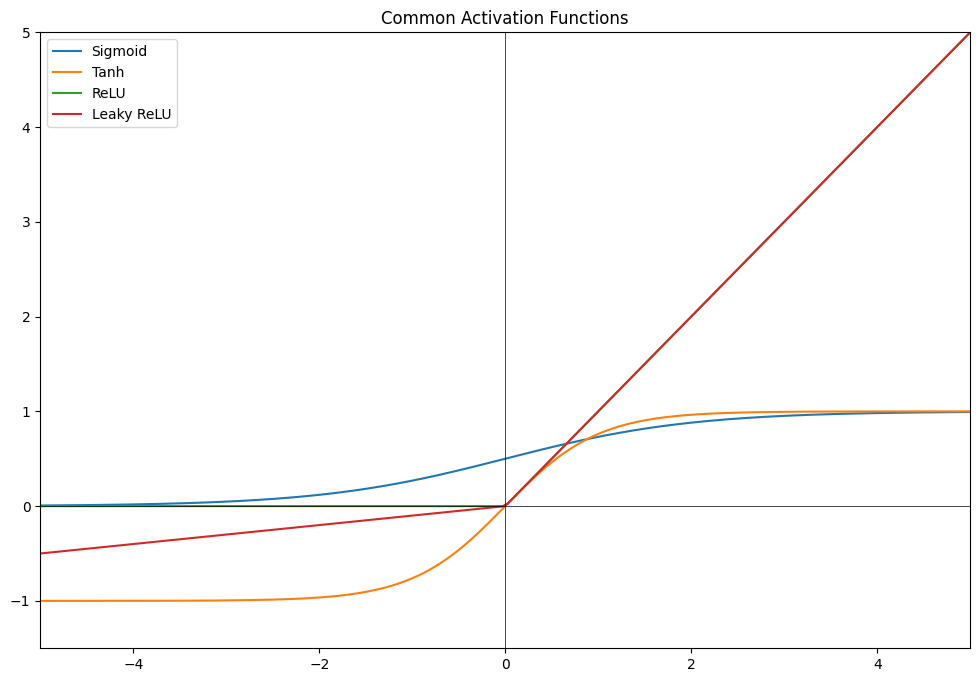

In [2]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-5, 5, 200)

# Sigmoid
sigmoid = 1 / (1 + np.exp(-x))

# Tanh
tanh = np.tanh(x)

# ReLU
relu = np.maximum(0, x)

# Leaky ReLU
alpha = 0.1
leaky_relu = np.where(x >= 0, x, alpha*x)

plt.figure(figsize=(12, 8))
plt.plot(x, sigmoid, label='Sigmoid')
plt.plot(x, tanh, label='Tanh')
plt.plot(x, relu, label='ReLU')
plt.plot(x, leaky_relu, label='Leaky ReLU')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.ylim([-1.5, 5])
plt.xlim([-5, 5])
plt.legend()
plt.title('Common Activation Functions')
plt.show()

## 6. Example Calculations

### Weights, Bias, and Activation
For a single neuron:
$$ z = w_1 x_1 + w_2 x_2 + ... + w_n x_n + b $$
where $ w_i $ are the weights, $ x_i $ are inputs, and $ b $ is the bias.

Then we apply an activation function $ f(z) $. For example, if $ f $ is ReLU:
$$
f(z) = \max(0, z).
$$

### Example Calculation
- Suppose inputs are $ x_1 = 2, x_2 = -1 $.
- Suppose weights are $ w_1 = 0.5, w_2 = 1 $, and bias $ b = -0.5 $.
- Then: $ z = (0.5)(2) + (1)(-1) + (-0.5) = 1 -1 -0.5 = -0.5 $.
- ReLU($-0.5$) = $ \max(0, -0.5) = 0 $. The neuron output is 0.


## 7. Step-by-Step Example from Scratch

Let's make a tiny neural network **manually** (with code) to see how activation functions come into play.

1. We'll define a single-layer neural network with 2 inputs and 1 output.
2. We'll apply ReLU as the activation.
3. We'll do a forward pass.
4. We'll do a simple dummy backprop pass (just for demonstration).


In [3]:
import numpy as np

# 1. Initialize random weights and bias
np.random.seed(42)
w = np.random.randn(2)  # for 2 inputs
b = np.random.randn()   # single bias

def relu(x):
    return np.maximum(0, x)

def forward_pass(x):
    # x is a numpy array of shape (2,)
    z = np.dot(w, x) + b
    return relu(z)

# Example input
x_input = np.array([0.5, -1.2])
output = forward_pass(x_input)
print(f"Weights: {w}")
print(f"Bias: {b}")
print(f"Input: {x_input}")
print(f"Output after ReLU: {output}")

Weights: [ 0.49671415 -0.1382643 ]
Bias: 0.6476885381006925
Input: [ 0.5 -1.2]
Output after ReLU: 1.0619627760117303


## 8. Illustrative Problem It Solves
Activation functions help networks learn **non-linear** decision boundaries. For instance, if you're building a classifier to separate images of cats and dogs, a simple linear function wouldn't be enough to capture all the nuances. An activation function, combined with deeper layers, helps the network capture complex patterns in fur texture, shape, color, etc.


## 9. Real-World Problem It Solves
In **medical image analysis**, activation functions enable neural nets to detect tumors or anomalies, capturing complicated shapes. Without non-linear activation, the model would not accurately identify subtle variations in scans.


## 10. Questions to Ponder
1. What happens if we remove the activation function?
2. How does the shape of the activation function affect learning?
3. Why is differentiation important for activation functions?
4. Why might we choose ReLU over Sigmoid?
5. Are there activations better than ReLU?
6. How do we pick an activation function in practice?


## 11. Answers & Code Examples

Below are some brief answers:
1. **If we remove the activation function** (i.e., use the identity function), the network becomes a linear model and can't learn complex patterns.
2. **Shape affects learning** because it influences how gradients flow back through the network. Steeper slopes might learn faster but can also lead to instability.
3. **Differentiation is crucial** because we need to compute gradients during backpropagation to update weights.
4. **ReLU vs Sigmoid**: ReLU mitigates the vanishing gradient problem and often trains faster. Sigmoid saturates for large positive/negative inputs, causing tiny gradients.
5. **Better than ReLU?** Some argue that leaky ReLU, ELU, or Swish can be better in certain applications, but ReLU remains a strong default.
6. **Picking an activation** usually depends on the task, network depth, and empirical experiments. ReLU-like activations are common for hidden layers; Sigmoid or Softmax for output layers (depending on the problem).


## 12. A Sample Exercise
Below is a small snippet to train a simple neural network with TensorFlow/Keras on a dummy dataset. Fill in the TODO items to complete the code.


In [8]:
# TODO: Import the necessary libraries
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Create some dummy data
np.random.seed(42)
X = np.random.rand(100, 2)
y = (X[:,0] + X[:,1] > 1).astype(int)  # label = 1 if sum of features > 1

# TODO: Define a simple Sequential model with one hidden layer
model = keras.Sequential([
    layers.Dense(4, activation='relu', input_shape=(2,)),  # TODO: hidden units and activation
    layers.Dense(1, activation='sigmoid')                  # TODO: output layer and activation
])

# TODO: Compile the model with an appropriate loss, optimizer, and metric
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# TODO: Train the model
model.fit(X, y, epochs=100, batch_size=4)

# Evaluate
loss, acc = model.evaluate(X, y)
print(f"Training Loss: {loss:.4f}, Training Accuracy: {acc:.4f}")

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4404 - loss: 0.7091
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4729 - loss: 0.7015     
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5543 - loss: 0.6933 
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4828 - loss: 0.6996 
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4943 - loss: 0.6922 
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5565 - loss: 0.6872 
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5813 - loss: 0.6847 
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5975 - loss: 0.6787 
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5408 - loss: 0.6847 
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7344 - loss: 0.6778  
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6723 - loss: 0.6795 
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/s

## 13. Glossary
- **Neuron**: Basic unit of a neural network; takes inputs, applies weights, adds bias, and passes result through an activation.
- **Weight**: A coefficient for input features.
- **Bias**: A constant term added to the weighted inputs.
- **Activation Function**: A function applied to the neuron's weighted sum to introduce non-linearity.
- **ReLU**: Rectified Linear Unit; $\max(0, x)$.
- **Sigmoid**: A function squashing values between 0 and 1.
- **Tanh**: A function squashing values between -1 and 1.
- **Softmax**: Converts a vector of values into a probability distribution.
- **Vanishing Gradient**: A problem where gradients become very small, slowing or preventing learning.
- **Dead Neuron**: A neuron that outputs zero for all inputs (common with ReLU if weights/bias lead to negative inputs).


In [9]:
import os, sys, platform, datetime, uuid, socket

def signoff(name="Anonymous"):
    colab_check = "Yes" if 'google.colab' in sys.modules else "No"
    mac_addr = ':'.join(format((uuid.getnode() >> i) & 0xff, '02x') for i in reversed(range(0, 48, 8)))
    print("+++ Acknowledgement +++")
    print(f"Executed on: {datetime.datetime.now()}")
    print(f"In Google Colab: {colab_check}")
    print(f"System info: {platform.system()} {platform.release()}")
    print(f"Node name: {platform.node()}")
    print(f"MAC address: {mac_addr}")
    try:
        print(f"IP address: {socket.gethostbyname(socket.gethostname())}")
    except:
        print("IP address: Unknown")
    print(f"Signing off, {name}")

signoff("Ali Muhammad Asad")

+++ Acknowledgement +++
Executed on: 2025-01-28 12:55:18.058367
In Google Colab: Yes
System info: Linux 6.1.85+
Node name: bbf792736785
MAC address: 02:42:ac:1c:00:0c
IP address: 172.28.0.12
Signing off, Ali Muhammad Asad
